In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Iris.csv')

In [4]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.sample(15)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
11,12,4.8,3.4,1.6,0.2,Iris-setosa
148,149,6.2,3.4,5.4,2.3,Iris-virginica
1,2,4.9,3.0,1.4,0.2,Iris-setosa
124,125,6.7,3.3,5.7,2.1,Iris-virginica
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
149,150,5.9,3.0,5.1,1.8,Iris-virginica
29,30,4.7,3.2,1.6,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor


In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: xlabel='SepalLengthCm'>

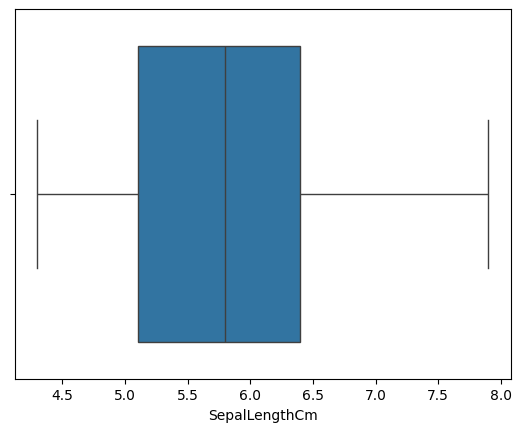

In [13]:
sns.boxplot(data=data, x='SepalLengthCm')

<Axes: xlabel='SepalWidthCm'>

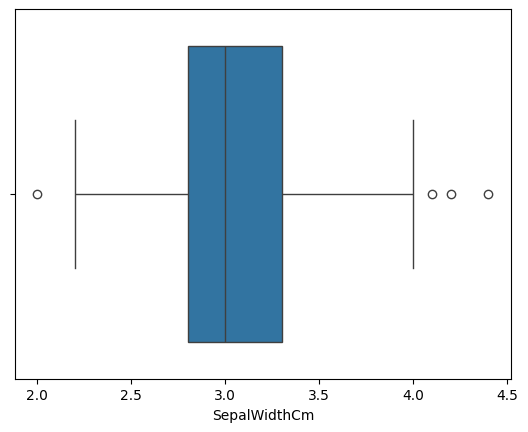

In [16]:
sns.boxplot(data=data, x='SepalWidthCm')

<Axes: xlabel='PetalLengthCm'>

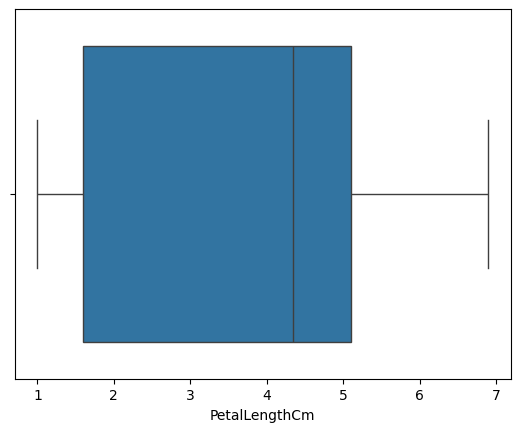

In [18]:
sns.boxplot(data=data, x='PetalLengthCm')

<Axes: xlabel='PetalWidthCm'>

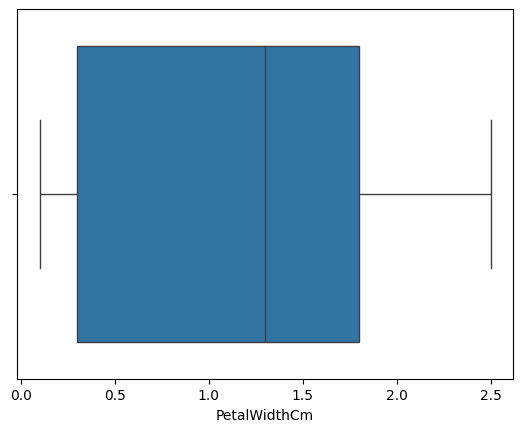

In [19]:
sns.boxplot(data=data, x='PetalWidthCm')

In [23]:
def remove_outlier(data, column):
    mean = data[column].mean()
    std = data[column].std()
    threshold = 3 * std

    zScore = (data[column] - mean) / std

    removed = data[np.abs(zScore) <= threshold]

    return removed


data_no_outLier = remove_outlier(data, 'SepalWidthCm')
data = data_no_outLier


<Axes: xlabel='SepalWidthCm'>

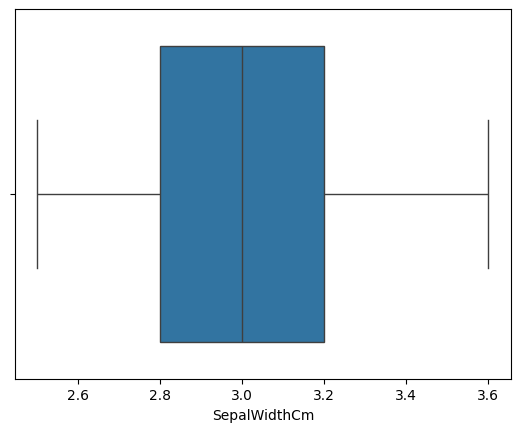

In [25]:
sns.boxplot(data=data, x='SepalWidthCm')

In [28]:
Species_mapping={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
data['Species']=data['Species'].map(Species_mapping)
data['Species']=data['Species'].astype('int')

<Axes: >

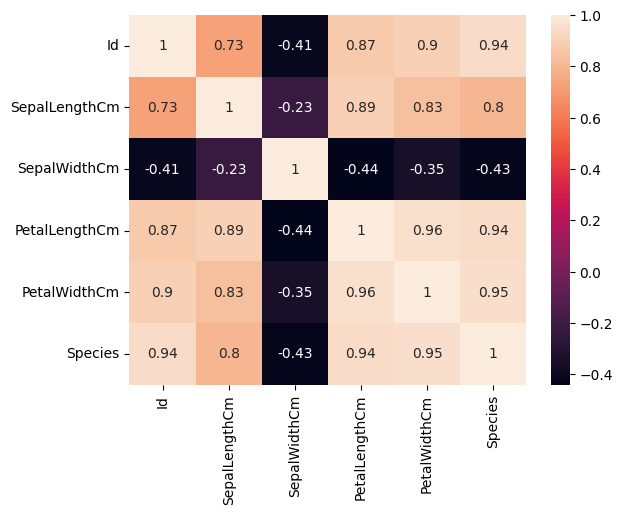

In [30]:
sns.heatmap(data.corr(), annot=True)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [46]:
X = data[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']]
Y = data['Species']

In [47]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [496, 124]

In [37]:
gauss = GaussianNB()

In [38]:
gauss.fit(X_train, Y_train)

GaussianNB()

In [39]:
prediction = gauss.predict(X_test)
print('prediction : ',prediction)

prediction :  [2 0 1 1 0 0 2 0 2 1 1 2 2 0 0 2 1 0 1 1 1 2 0 2 2]


In [41]:
score = gauss.score(X_test, Y_test )
print('Score : ',score)

Score :  0.92


In [60]:
accuracy = accuracy_score(Y_test, prediction)
print('Accuracy:', accuracy)

recall = recall_score(Y_test, prediction, average='macro')
print('recall:', recall)

precision = precision_score(Y_test, prediction, average='macro')
print('Precision:', precision)

F1 = f1_score(Y_test, prediction, average='macro')
print('F1:', F1)

Accuracy: 0.92
recall: 0.9212962962962963


In [54]:
recall = recall_score(Y_test, prediction, average='macro')
print('recall:', recall)

recall: 0.9212962962962963


Precision: 0.9212962962962963


F1: 0.9212962962962963


<Axes: >

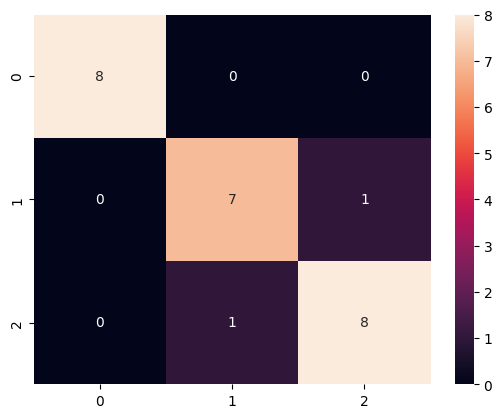

In [59]:
confMat = confusion_matrix(Y_test, prediction)
sns.heatmap(confMat, annot=True)